# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.

## KrbNote
To play around with the raw data, import helper in iPython.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


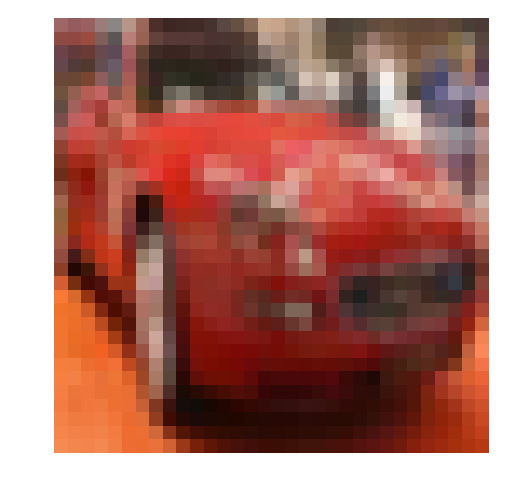

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)


## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    x = np.array(x)
    return x/255.


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
lab_to_hot = {
    0: [1]+list(np.zeros(9,dtype='int32')),
    1: [0,1]+list(np.zeros(8,dtype='int32')),
    2: [0,0,1]+list(np.zeros(7,dtype='int32')),
    3: [0,0,0,1]+list(np.zeros(6,dtype='int32')),
    4: [0,0,0,0,1]+list(np.zeros(5,dtype='int32')),
    5: list(np.zeros(5,dtype='int32'))+[1,0,0,0,0],
    6: list(np.zeros(6,dtype='int32'))+[1,0,0,0],
    7: list(np.zeros(7,dtype='int32'))+[1,0,0],
    8: list(np.zeros(8,dtype='int32'))+[1,0],
    9: list(np.zeros(9,dtype='int32'))+[1]
    }

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    output=[lab_to_hot[label] for label in x]
    return np.array(output)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [2]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a bach of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    img=image_shape
    return tf.placeholder(tf.float32, shape=(None,img[0],img[1],img[2]), name="x")


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    return tf.placeholder(tf.float32, shape=(None,n_classes), name="y")


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    return tf.placeholder(tf.float32, name="keep_prob")


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [3]:
import numpy as np
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides, padding='SAME',
                  activation=None, keep_prob=None): 
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    filt_h = conv_ksize[0];    filt_w = conv_ksize[1]
    fstr_h = conv_strides[0];  fstr_w = conv_strides[1]
    pool_h = pool_ksize[0];    pool_w = pool_ksize[1]
    pstr_h = pool_strides[0];  pstr_w = pool_strides[1]
    x_h = x_tensor.get_shape()[1].value
    x_w = x_tensor.get_shape()[2].value
    x_d = x_tensor.get_shape()[3].value
    n_features = filt_h * filt_w * x_d
    
    #=======================================
    # Layer Parameters
    #=======================================
    weights = tf.Variable(tf.truncated_normal([filt_h,filt_w,x_d,conv_num_outputs],
                                               mean=0, stddev=np.sqrt(2.0/n_features) ))#0.1
    #bias = tf.Variable(tf.truncated_normal([conv_num_outputs], mean=0, stddev=0.1))
    bias = tf.Variable(tf.zeros([conv_num_outputs]))
            
    #=======================================
    # Convolution Layer
    #=======================================
    conv_layer = tf.nn.conv2d( x_tensor, weights, strides=[1,fstr_h,fstr_w,1], padding=padding )
    conv_layer = tf.nn.bias_add( conv_layer, bias )
    
    #=======================================
    # Activation Function
    #=======================================
    if activation == 'relu':
        conv_layer = tf.nn.relu(conv_layer)
    elif activation == 'sigmoid':
        conv_layer = tf.nn.sigmoid(conv_layer)
    elif activation == 'tanh':
        conv_layer = tf.nn.tanh(conv_layer)
    elif activation == 'softplus':
        conv_layer = tf.nn.softplus(conv_layer)
    
    #=======================================
    # Max Pooling Option
    #=======================================
    conv_layer = tf.nn.max_pool( conv_layer, ksize=[1,pool_h,pool_w,1], 
                                strides=[1,pstr_h,pstr_w,1], padding='SAME' )
    
    #=======================================
    # Drop Out Option
    #=======================================
    if keep_prob != None:
        conv_layer = tf.nn.dropout(conv_layer, keep_prob)
    
    return conv_layer 



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [4]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    img_h = x_tensor.get_shape()[1].value
    img_w = x_tensor.get_shape()[2].value
    img_d = x_tensor.get_shape()[3].value
    return tf.reshape(x_tensor,shape=(-1,img_h*img_w*img_d))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### A Little Extra Something:  Inflate Layer
This reverse the flatten() operation.

In [5]:
def inflate(x_tensor, img_h,img_w, img_d):
    """
    Inflate x_tensor to (Batch Size, height, width, depth)
    : x_tensor: A tensor of size (Batch Size, fDim), where fDim is the flattened image dimension.
    : return: A tensor of size (Batch Size, height, width, depth).
    """
    img_f = x_tensor.get_shape()[1].value
    assert img_f == img_h*img_w*img_d
    
    return tf.reshape(x_tensor,shape=(-1,img_h,img_w,img_d))



### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [6]:
def fully_conn(x_tensor, num_outputs, activation=None, keep_prob=None):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    img_hwd = x_tensor.get_shape()[1].value
    n_features = img_hwd
    
    #=======================================
    # Layer Parameters
    #=======================================
    weight = tf.Variable(tf.truncated_normal([img_hwd, num_outputs], mean=0, stddev=np.sqrt(2.0/n_features)))#0.1
    #bias   = tf.Variable(tf.truncated_normal([num_outputs], mean=0, stddev=0.01))
    bias   = tf.Variable(tf.zeros([num_outputs]))
        
    #=======================================
    # Fully Connected Layer
    #=======================================
    fc_layer = tf.add(tf.matmul(x_tensor, weight), bias)
    
    #=======================================
    # Activation Function
    #=======================================
    if activation=='relu':
        fc_layer = tf.nn.relu(fc_layer)
    elif activation=='sigmoid':
        fc_layer = tf.nn.sigmoid(fc_layer)
    elif activation=='tanh':
        fc_layer = tf.nn.tanh(fc_layer)
    elif activation=='softplus':
        fc_layer = tf.nn.softplus(fc_layer)
        
    #=======================================
    # Post-Layer Drop Out Option
    #=======================================
    if keep_prob != None:
        fc_layer = tf.nn.dropout(fc_layer, keep_prob)
       
    return fc_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [7]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    output_layer = fully_conn(x_tensor,num_outputs)
    return output_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

**Note to Self**: the input images are 32x32x3.

In [8]:
keep_prob=0.6
x = neural_net_image_input((32, 32, 3))
cl = conv2d_maxpool(x, conv_num_outputs=25, conv_ksize=(5,5), conv_strides=(1,1), 
         pool_ksize=(2,2), pool_strides=(2,2), activation='relu', keep_prob=keep_prob)
cl = conv2d_maxpool(cl, conv_num_outputs=50, conv_ksize=(7,7), conv_strides=(1,1), 
        pool_ksize=(2,2), pool_strides=(2,2), activation='relu', keep_prob=keep_prob)
cl = conv2d_maxpool(cl, conv_num_outputs=100, conv_ksize=(9,9), conv_strides=(1,1), 
           pool_ksize=(1,1), pool_strides=(1,1), activation='relu', keep_prob=keep_prob)
fcl = flatten(cl)
fcl = fully_conn(fcl,  50, activation='relu', keep_prob=keep_prob)#, keep_prob=0.8) # Drop Out on this layer is too expensive in epochs

fcl


<tf.Tensor 'dropout_3/mul:0' shape=(?, 50) dtype=float32>

In [117]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """

    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    
    # Keep_Prob by Layer Type
    # -- change coefficients to experiment
    # -- ultimately found not to have huge impact...
    conv_kp = (7.0/5.0)*keep_prob
    fc_kp = keep_prob  
    
    
    # CL1: (b,32,32,3)-dim Tensor --> (b,,,)
    #x=tf.nn.dropout(x,keep_prob)
    cl = conv2d_maxpool(x, conv_num_outputs=50, conv_ksize=(5,5), conv_strides=(1,1), 
           pool_ksize=(2,2), pool_strides=(2,2), activation='relu', keep_prob=conv_kp)
    
    # CL2: (b,,,)-dim Tensor --> (b,,,)
    #cl = tf.nn.dropout(cl,keep_prob)
    cl = conv2d_maxpool(cl, conv_num_outputs=100, conv_ksize=(5,5), conv_strides=(1,1), 
           pool_ksize=(2,2), pool_strides=(2,2), activation='relu', keep_prob=conv_kp)
    
    # CL3: (b,,,)-dim Tensor --> (b,6,,)
    #cl = tf.nn.dropout(cl,keep_prob)
    #cl = conv2d_maxpool(cl, conv_num_outputs=1000, conv_ksize=(3,3), conv_strides=(1,1), 
    #       pool_ksize=(1,1), pool_strides=(1,1), activation='relu', keep_prob=conv_kp)

    # TODO: Apply a Flatten Layer
    # (b,,,) -->  (b,)
    fcl = flatten(cl)
    

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # (b,,,) -->  (b,)
    fcl = fully_conn(fcl,  100, activation='sigmoid', keep_prob = fc_kp)#, keep_prob=0.8) # Drop Out on this layer is too expensive in epochs
    
    # 2nd Layer generally degrades performance (or at least doesn't seem to add much)......
    #fcl = fully_conn(fcl,  30, activation='relu', keep_prob=fc_kp)
        
    # 3rd FCL totally not necessary
    #fcl = fully_conn(fcl,  100, activation='sigmoid', keep_prob=keep_prob)
    
#400,200 (or no fcl)


    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    ol = output(fcl, 10)
    
    
    # TODO: return output
    return ol


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

### List Comprehensions
I implemented the one-hot encoder with a for loop initially.  Didn't matter until I went to test `train_neural_network` below.  Then it mattered big time.  Literally.  Suffered through a half hour before I interrupted the kernel b/c "this can't be right!"  Looked through my code and realized with horror I'd made a rookie move: for loop spotted!  I replaced the monstrosity with a list comprehension, then re-ran the cells, stopping here at `train_neural_network`.  With trepidation, my fingers made the next move: &lt;shift&gt;+&lt;enter&gt;...  Before I could look away, the cell completed -- test passed!  Moral of story: Whoa, list comprehensions are tachyonic.

In [118]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    session.run(optimizer, feed_dict={
                x: feature_batch,
                y: label_batch,
                keep_prob: keep_probability})



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

**Note to Self**:  The global variables are defined above like so:
<center>valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))</center>

In [119]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    valid_size = valid_features.shape[0]
    loss = session.run( cost, feed_dict={
            x: feature_batch, 
            y: label_batch, 
            keep_prob: 1.} )
    acc  = session.run(accuracy, feed_dict={
            x: valid_features,
            y: valid_labels, 
            keep_prob: 1.})

    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
            loss,  acc))
    
    

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [120]:
epochs = 30
batch_size = 32
keep_probability = 0.5
# Note: keep_prob is for conv layers, (2/3)*keep_probability for FC Layers

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [121]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Loss:     1.7816 Validation Accuracy: 0.397400
Epoch  2, CIFAR-10 Batch 1:  Loss:     1.6070 Validation Accuracy: 0.418400
Epoch  3, CIFAR-10 Batch 1:  Loss:     1.4018 Validation Accuracy: 0.496200
Epoch  4, CIFAR-10 Batch 1:  Loss:     1.2261 Validation Accuracy: 0.520600
Epoch  5, CIFAR-10 Batch 1:  Loss:     0.9604 Validation Accuracy: 0.544000
Epoch  6, CIFAR-10 Batch 1:  Loss:     0.9311 Validation Accuracy: 0.546200
Epoch  7, CIFAR-10 Batch 1:  Loss:     0.7201 Validation Accuracy: 0.567800
Epoch  8, CIFAR-10 Batch 1:  Loss:     0.7331 Validation Accuracy: 0.587600
Epoch  9, CIFAR-10 Batch 1:  Loss:     0.6175 Validation Accuracy: 0.591400
Epoch 10, CIFAR-10 Batch 1:  Loss:     0.4926 Validation Accuracy: 0.610600
Epoch 11, CIFAR-10 Batch 1:  Loss:     0.4367 Validation Accuracy: 0.602200
Epoch 12, CIFAR-10 Batch 1:  Loss:     0.4005 Validation Accuracy: 0.600200
Epoch 13, CIFAR-10 Batch 1:  Loss:     0.3051

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [123]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss:     1.7759 Validation Accuracy: 0.395800
Epoch  1, CIFAR-10 Batch 2:  Loss:     1.3657 Validation Accuracy: 0.451600
Epoch  1, CIFAR-10 Batch 3:  Loss:     1.1986 Validation Accuracy: 0.495000
Epoch  1, CIFAR-10 Batch 4:  Loss:     1.5230 Validation Accuracy: 0.512600
Epoch  1, CIFAR-10 Batch 5:  Loss:     1.4804 Validation Accuracy: 0.552800
Epoch  2, CIFAR-10 Batch 1:  Loss:     1.2308 Validation Accuracy: 0.560200
Epoch  2, CIFAR-10 Batch 2:  Loss:     0.8088 Validation Accuracy: 0.572600
Epoch  2, CIFAR-10 Batch 3:  Loss:     0.8277 Validation Accuracy: 0.587000
Epoch  2, CIFAR-10 Batch 4:  Loss:     1.0635 Validation Accuracy: 0.605400
Epoch  2, CIFAR-10 Batch 5:  Loss:     1.3458 Validation Accuracy: 0.622800
Epoch  3, CIFAR-10 Batch 1:  Loss:     0.9441 Validation Accuracy: 0.621800
Epoch  3, CIFAR-10 Batch 2:  Loss:     0.4681 Validation Accuracy: 0.628200
Epoch  3, CIFAR-10 Batch 3:  Loss:     0.5790 Validation Accuracy: 0.635200


# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

Testing Accuracy: 0.7349241214057508



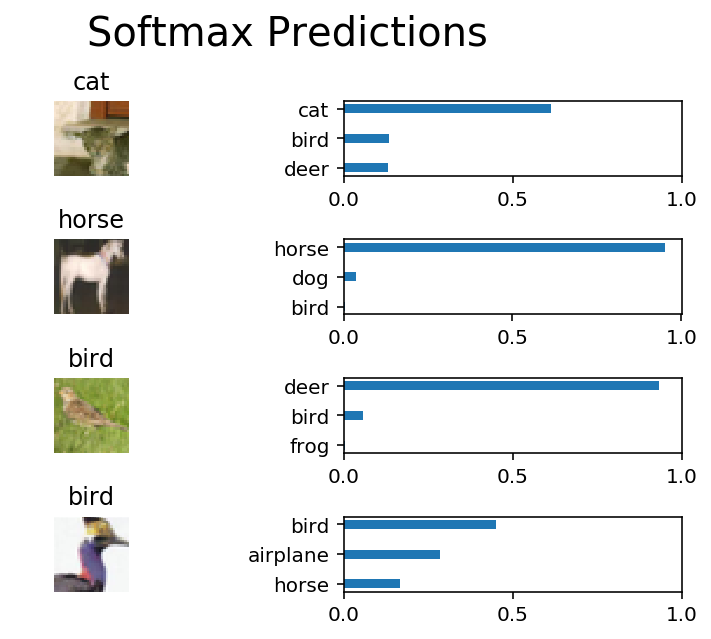

In [124]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.

# Notes 2 Self
CIFAR-10 has 60k 32x32x3 images.  Each training batch file has 10k images, which lies between 2<sup>13</sup> and 2<sup>14</sup>.

### Batch Size
Generally seems like the smaller my batch size, the better the validation accuracy...but only up to a point. For example, a batch size of 4 seems to perform terribly (stuck around 0.1), and though a batch size of 8 seem to climb, it does so slowly and with deceleration, eventually stagnating in a suboptimal region of the parameter space.  A batch size of 16 sometimes works pretty well, other times not so much.  Seems like somewhere in the range of 32-64 is an optimal batch size. However, this can make the training time extremely long if the network has too many weights to learn.

So I Googled it and came to this [StackExchange](http://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network) w/ this quote:

"The stochastic gradient descent method and its variants are algorithms of choice for many Deep Learning tasks. These methods operate in a small-batch regime wherein a fraction of the training data, usually 32--512 data points, is sampled to compute an approximation to the gradient. It has been observed in practice that when using a larger batch there is a significant degradation in the quality of the model, as measured by its ability to generalize. There have been some attempts to investigate the cause for this generalization drop in the large-batch regime, however the precise answer for this phenomenon is, hitherto unknown. In this paper, we present ample numerical evidence that supports the view that large-batch methods tend to converge to sharp minimizers of the training and testing functions -- and that sharp minima lead to poorer generalization. In contrast, small-batch methods consistently converge to flat minimizers, and our experiments support a commonly held view that this is due to the inherent noise in the gradient estimation. We also discuss several empirical strategies that help large-batch methods eliminate the generalization gap and conclude with a set of future research ideas and open questions."

### Sensitivity of Initialization 
My model was performing terribly for a while, and it wasn't only because my AWS g2.2xlarge instanced hadn't been approved of by Amazon yet.  No matter what I did, my model was as good as a guess (10%) or worse!

What the heck could be going on?  Turned out that my parameter initializations were too big.  After setting the stddev in my truncated_normal() expression to 0.1 things began to sky rocket...sort of.  Things actually became frustrating for a while:  though I was doing much better than a guess, it seemed no matter what I tried, my net would get stuck just under 0.5 validation accuracy. I tweaked and re-tweaked my convolutional layers, added more dense layers, removed layers, and even create the "inflate function" above so that I could toggle between convolutional and dense layers... But nothing.  Still under 0.5

Solution? You guessed it: tweaked my initializations again and made them even smaller (0.01).  Things seemed better: I would occasionally fluctuate above 0.5, but only to drop again to somewhere just a nudge below.  Should I go smaller? Nope: 0.001 seemed to make things worse.  

Ultimately, after a lot of reading, I set it to sqrt(2.0/n_features), which seems to be fairly common.  The initializations need to take on slightly different scales depending on the specifics going into the layer. For a convolutional layer, I presume this amounts to (filter area) x (input depth).   

For example, for my first convolutional layer I use 5x5 filter over a 3-channel image, which means that the convolutional layer sees 5x5x3=75 incoming features.  This corresponds to stdev = sqrt(2.0/75) = 0.16.  However, if I choose an output depth of 16 on this layer, and a 7x7 filter on my next convolutional layer, then this layer sees an equivalent of 7x7x16=784 incoming features, which suggests an initialization of stedev = sqrt(2.0/784) = 0.05.


### Keep Probability
Seems that a KP of 0.5 has a low start (~0.1), but asteady, consistent growth in validation accuracy.  In contrast, a KP of 0.75 starts out with a validation accuaracy that is much higher (~0.3) and grows quickly at first, but then slows down quite a bit.  Given 50 epochs, both seem to perform about the same... A KP of 0.25 performs much worse, stagnating at no better than a guess.

### Fully Connected Layers:  Wide, Narrow, Few, Many
On my intial designs, I found that one really wide FCL will get your pretty far, pretty fast---then stagnate.  The best I could seem to do was a 0.5 validation accuracy.  If you keep it wide and add a second FCL, your net is basically doomed: learning becomes damn near impossible.  However, if you instead use two fairly narrow FCLs, then you get about the same performance as the one really wide FCL... In fact, the more I've experimented the more it seems like you really have to make that first FC Layer after the last conv layer pretty damn narrow; otherwise there are way too many weights to learn.

Later on, I realized my biggest bottleneck was poorly designing the convolutional layers.  In fact, it seems a good design at the convolution stage dictates your model performances almost exclusively.  See section investigating whether or not FC Layers really help all that much.

### Drop Out on the Visible Layer
Apparently in the original paper, this was recommended.  I've implemented it...seems to work a little, but not much. Requires more epochs, likely because it's equivalent to discarding input data altogether...
Some [useful tips](http://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/).


### Drop Out on the Fully-Connected Layer
This can be helpful, however there are definitely some precautions to take --- especially if you don't have a GPU, which was my issue for about a week!  For example, if you're using a global keep_prob of 0.5, and you apply drop out to the transition between the lasty convolutional layer and the first fully-connected layer you will need many, many epochs to see good results.  This is why I re-designed my layer functions to have keep_prob as an input parameter: it seemed necessary to allow the keep_prob to differ between that applied to the convolutional layers and that applied to the fully-connected layers. This gave a good compromise between the benefits of drop out on a FC layer and the run time required to get the validation accuaracy high up. However, it is only a part of the story.

What I ultimately found is that the issue (aside from no GPU!) really has to do with that transition layer between the last convolutional layer and first fully-connected layer.  This transition can have a lot of weights, which can already demand quite some epochs in order to properly learn.  A drop out only adds to this, demanding even more epochs achieve desirable results (even with a keep_prob as  relaxed as 0.9).  I found that, timewise, it can be better to forgo dropout at this transition.  If one has two FC layers, then dropout can be applied between these two layers with less burned on the learning task. However, the first observation still applies:  (i) each time drop out is applied at a layer, it's likely one will require more epochs to successfully train the model; (ii) the more weights one drops per drop out, the more epochs one will likely need.  To balance drop out and number of epochs, one can play around with locally assigning different keep_probs to each transition layer, or one might choose a higher "global" keep_prob to apply to all layers. 


That all said, if all you care about it quickly getting the validation accuracy above 0.5, then taking out the second FC layer does dramatically more to improve the model's performance (e.g., it took 7 epochs on my final model w/o 2nd FCL). However, after getting above 0.50, it hangs around there for quite a while (still near 0.57 after 50 epochs).  

This is slightly improved by applying drop out at each layer, but it seems like if you want to get higher than 0.60, you really might need the 2nd FCL.

UPDATE:  Once my GPU was working on Amazon again, none of this really mattered!  The true lesson learned, then, is that your hardware can be your biggest bottleneck.  Improve your hardware, and you can explore more optimal regions of the parameter space.

Another note:  Small batch sizes still apply.  It is amazing how much quicker (in terms of epoch) a batch size of 32 does than, say, a batch size of 128.  Heck, I even found that 32 performs exceptionally better than a batch size of 50 on my final model.

### Are Fully-Connected Layers Worth It?
My project is already pretty damn late, so even after designing several networks scoring 0.72 to 0.73 on validation and test I wasn't happy.  That's too close to 0.8, and way too close when your project's late anyway!

The fully-connected layers bothered me during the various experimental phases I've gone through.  When I tweak a convolutional layer in a dramatic way, usually there is a noticeable effect on validation accuaracy.  But I found you can change quite a lot in the fully-connected portion of the graph (e.g., add or subtract a layer, use drop out or not) and maintain fairly similar results.

Take the following design:  

<center> 32x32x3 -> 16x16x25 -> 8x8x50 -> 8x8x100 = 6400 -> 50 </center>

| Conv Layer | Outputs | Filter Size | Filter Stride | Pool Size | Pool Stride | Activation | Keep Prob |
|------------|---------|-------------|---------------|-----------|-------------|------------|-----------|
| CL1 | 25  | (5,5) | (1,1) | (2,2) | (2,2) | relu | 0.5 |
| CL2 | 50  | (7,7) | (1,1) | (2,2) | (2,2) | relu | 0.5 |
| CL3 | 100 | (3,3) | (1,1) | (1,1) | (1,1) | relu | 0.5 |

| FC Layer | Outputs | Activation | Keep Prob |
|----------|---------|------------|-----------|
| FC1      | 50      | relu       | 0.5       |

With the FC Layer, 50 epochs on one CIFAR batch w/ sub-batch size of 32 gives a validation accuracy of 0.553, and 0.639 without the layer.  Worse, if you use 10, 20, 30, or 40 outputs, the model gets stuck at a guess (0.105). If you use 100 outputs, you get back up to 0.607.  It is difficult to say if this would perform better or worse than the FCL-free model given more training.  200 outputs gets up to 0.610. 400 outputs, 0.630.

Adding a second FC Layer just kills the performance, at least at 50 epochs.  I played around with this convolution design and a bunch of double FC-layer variations, and all reduced validation accuracy quite a bit.  This might be a case where better hardware and more waiting time improves things, but more than 50 epochs on the full CIFAR set gets pretty damn annoying to experiment with.



    

==========================================================================================

At one point I swear my GPU stopped working... I wait for like 30 - 60 minutes per run.  It's terrible.

### Some miscellaneous Nvidia-related files and directories I found:
* nvidia-375 directory installed in /lib:  contains modprobe.conf
* Tons of other nvidia files in /usr/bin:  nvidia-{bug-report.sh, cuda-mp-control, cuda-mps-server, debugdump, modprobe, persistencd, settings, smi, xconfig}
* /usr/include/nvidia-375
* /usr/lib/{nvidia, nvidia-367, nvidia-375, nvidia-375-prime}
* /usr/lib32/libvdpau_nvidia.so, nvidia-367, nvidia-375} ...
* /usr/local/cuda

### How to get CPU/GPU info:
* CPU Info:  cat /proc/cpuinfo:  Intel Xeon CPU E5-2650 (64-bit, 2.6 GHz)
* GPU Info:  lspci -v:  Looks like it's a Nvidia GK104GL [Grid K520]
* Apparently Nvidia GPU info is supposed to be held in /proc/driver/nvidia... But /proc/driver has no "nvidia" file or directory on my Udacity AMI...  [source](http://askubuntu.com/questions/5417/how-to-get-gpu-info)
* Also, to get info about my Nvidia GPU, I should be able to type "nvidia-smi" at the command line. Instead I see "NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running."

dpkg -l | grep nvidia <br/>
ii  nvidia-367                  375.39-0ubuntu0.16 amd64              Transitional package for nvidia-375 <br/>
ii  nvidia-367-dev              375.39-0ubuntu0.16 amd64              Transitional package for nvidia-375-dev <br/>
ii  nvidia-375                  375.39-0ubuntu0.16 amd64              NVIDIA binary driver - version 375.39 <br/>
ii  nvidia-375-dev              375.39-0ubuntu0.16 amd64              NVIDIA binary Xorg driver development files <br/>
ii  nvidia-modprobe             367.48-0ubuntu1    amd64              Load the NVIDIA kernel driver and create device files <br/>
ii  nvidia-opencl-icd-367       375.39-0ubuntu0.16 amd64              Transitional package for nvidia-opencl-icd-375 <br/>
ii  nvidia-opencl-icd-375       375.39-0ubuntu0.16 amd64              NVIDIA OpenCL ICD <br/>
ii  nvidia-prime                0.8.2              amd64              Tools to enable NVIDIA's Prime <br/>
ii  nvidia-settings             367.48-0ubuntu1    amd64              Tool for configuring the NVIDIA graphics driver

### Uninstalling/Reinstalling Nvidia stuff..
Trying to run nvidia-smi led me to some helpful info [here](https://devtalk.nvidia.com/default/topic/1000340/cuda-setup-and-installation/-quot-nvidia-smi-has-failed-because-it-couldn-t-communicate-with-the-nvidia-driver-quot-ubuntu-16-04/) and [here](http://jackmorrison.me/2014/09/11/CUDA-on-AWS.html).


I had a similar result to the OP [here](https://devtalk.nvidia.com/default/topic/1000340/cuda-setup-and-installation/-quot-nvidia-smi-has-failed-because-it-couldn-t-communicate-with-the-nvidia-driver-quot-ubuntu-16-04/) when I typed this command:
dpkg -l | grep nvidia <br/>
ii  nvidia-367                  375.39-0ubuntu0.16 amd64              Transitional package for nvidia-375 <br/>
ii  nvidia-367-dev              375.39-0ubuntu0.16 amd64              Transitional package for nvidia-375-dev <br/>
ii  nvidia-375                  375.39-0ubuntu0.16 amd64              NVIDIA binary driver - version 375.39 <br/>
ii  nvidia-375-dev              375.39-0ubuntu0.16 amd64              NVIDIA binary Xorg driver development files <br/>
ii  nvidia-modprobe             367.48-0ubuntu1    amd64              Load the NVIDIA kernel driver and create device files <br/>
ii  nvidia-opencl-icd-367       375.39-0ubuntu0.16 amd64              Transitional package for nvidia-opencl-icd-375 <br/>
ii  nvidia-opencl-icd-375       375.39-0ubuntu0.16 amd64              NVIDIA OpenCL ICD <br/>
ii  nvidia-prime                0.8.2              amd64              Tools to enable NVIDIA's Prime <br/>
ii  nvidia-settings             367.48-0ubuntu1    amd64              Tool for configuring the NVIDIA graphics driver

The advice given:
"You seem to have a mix of driver components from several different drivers. This is a broken config.  Follow the steps in the [cuda linux install guide](http://docs.nvidia.com/cuda/cuda-installation-guide-linux/index.html#handle-uninstallation) to remove every last scrap of NVIDIA software from your machine.  Then stop, and read the above linked guide in its entirety.  Then pick either the runfile install method, or the package manager install method, and follow the instructions."

---------------------------------

If/when I remove all the Nvidia software, here are [some simple steps](http://jackmorrison.me/2014/09/11/CUDA-on-AWS.html) I might try first.

I already figured out the GPU, but to follow the directions step-by-step I did it again a different way:
1. DL'd ubuntu-drivers:  sudo apt install ubuntu-drivers-common
2. sudo ubuntu-drivers devices

```{code}
== /sys/devices/pci0000:00/0000:00:03.0 ==
modalias : pci:v000010DEd0000118Asv000010DEsd00001014bc03sc00i00
vendor   : NVIDIA Corporation
model    : GK104GL [GRID K520]
driver   : xserver-xorg-video-nouveau - distro free builtin
driver   : nvidia-340 - distro non-free recommended

== cpu-microcode.py ==
driver   : intel-microcode - distro non-free
```

To figure out what drivers are needed, the OS must be known:
```{bash}
uname -a
Linux ip-172-31-69-77 4.4.0-66-generic #87-Ubuntu SMP Fri Mar 3 15:29:05 UTC 2017 x86_64 x86_64 x86_64 GNU/Linux

cat /etc/*release*
DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=16.04
DISTRIB_CODENAME=xenial
DISTRIB_DESCRIPTION="Ubuntu 16.04.1 LTS"
NAME="Ubuntu"
VERSION="16.04.1 LTS (Xenial Xerus)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 16.04.1 LTS"
VERSION_ID="16.04"
HOME_URL="http://www.ubuntu.com/"
SUPPORT_URL="http://help.ubuntu.com/"
BUG_REPORT_URL="http://bugs.launchpad.net/ubuntu/"
VERSION_CODENAME=xenial
UBUNTU_CODENAME=xenial
```

I think all that corresponds to these drivers: <br/>
http://www.nvidia.com/download/driverResults.aspx/108586/en-us